# Descriptive Analytics and Exploratory Analysis (EDA)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OUTPUT_DIR = "outputs"
cleaned_path = os.path.join(OUTPUT_DIR, "cleaned_dataset.csv")
if not os.path.exists(cleaned_path):
    raise FileNotFoundError(
        f"{cleaned_path} not found. Run 01_etl_data_quality.ipynb first."
    )
clean_df = pd.read_csv(cleaned_path)
print(f"Loaded cleaned dataset: {clean_df.shape}")

display(clean_df.head())

Loaded cleaned dataset: (240898, 8)


,Student_ID,Semster_Name,Paper_ID,Paper_Name,Marks,Effort_Hours,Department_ID,Department_Name
0,SID20131143,Sem_1,SEMI0012995,Paper 1,44.0,5.0,IDEPT7783,Centre for Distance Engineering Education Prog...
1,SID20131143,Sem_1,SEMI0015183,Paper 2,74.0,8.0,IDEPT7783,Centre for Distance Engineering Education Prog...
2,SID20131143,Sem_1,SEMI0018371,Paper 3,80.0,8.0,IDEPT7783,Centre for Distance Engineering Education Prog...
3,SID20131143,Sem_1,SEMI0015910,Paper 4,44.0,5.0,IDEPT7783,Centre for Distance Engineering Education Prog...
4,SID20131143,Sem_1,SEMI0016208,Paper 5,95.0,12.0,IDEPT7783,Centre for Distance Engineering Education Prog...


### Descriptive statistics and missingness overview


In [2]:
print("\nOverall Summary Statistics:")
display(clean_df.describe(include="all"))

print("\nData Types:")
display(clean_df.dtypes)

print("\nMissing Values:")
display(clean_df.isna().sum())


Overall Summary Statistics:


,Student_ID,Semster_Name,Paper_ID,Paper_Name,Marks,Effort_Hours,Department_ID,Department_Name
count,240898,240898,240898,240898,240898.000000,240898.000000,240842,240842
unique,3819,8,56,7,NaN,NaN,41,44
top,SID20133506,Sem_7,SEMI0055343,Paper 6,NaN,NaN,IDEPT5528,Center for Learning and Teaching (PPCCLT)
freq,224,30141,4323,34450,NaN,NaN,12504,9758
mean,NaN,NaN,NaN,NaN,69.574231,8.082707,NaN,NaN
std,NaN,NaN,NaN,NaN,18.095418,2.789704,NaN,NaN
min,NaN,NaN,NaN,NaN,19.000000,2.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,54.000000,6.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,70.000000,7.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,85.000000,10.000000,NaN,NaN



Data Types:


Student_ID          object
Semster_Name        object
Paper_ID            object
Paper_Name          object
Marks              float64
Effort_Hours       float64
Department_ID       object
Department_Name     object
dtype: object


Missing Values:


Student_ID          0
Semster_Name        0
Paper_ID            0
Paper_Name          0
Marks               0
Effort_Hours        0
Department_ID      56
Department_Name    56
dtype: int64

### Visualizations: marks distribution and effort vs marks


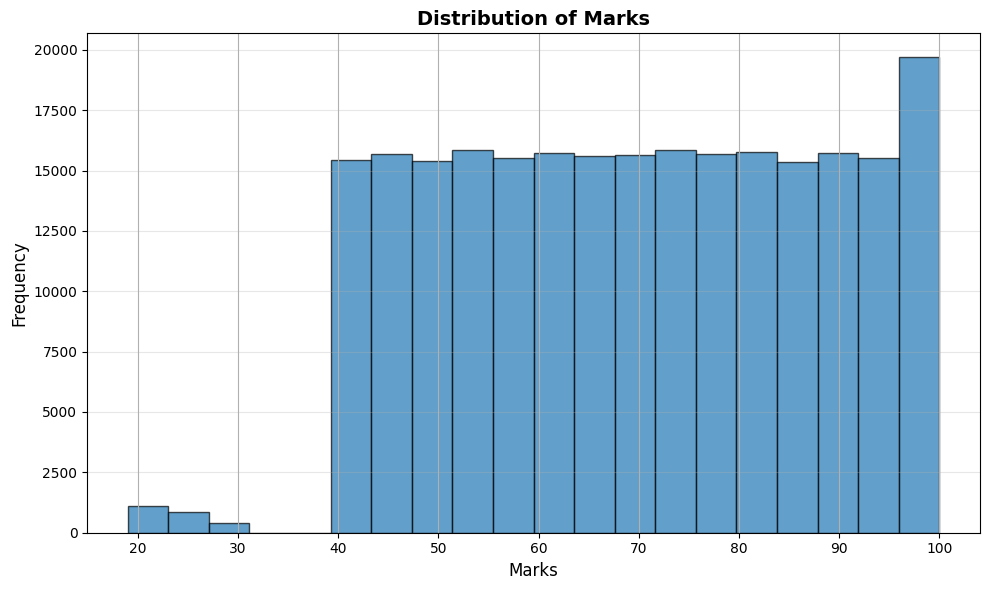

Marks Statistics:
  - Mean: 69.57
  - Median: 70.00
  - Std Dev: 18.10
  - Min: 19.00
  - Max: 100.00


In [3]:
plt.figure(figsize=(10, 6))
clean_df["Marks"].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Marks", fontsize=14, fontweight='bold')
plt.xlabel("Marks", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "Distribution_Of_Marks.png"), dpi=300, bbox_inches="tight")
plt.show()


print(f"Marks Statistics:")
print(f"  - Mean: {clean_df['Marks'].mean():.2f}")
print(f"  - Median: {clean_df['Marks'].median():.2f}")
print(f"  - Std Dev: {clean_df['Marks'].std():.2f}")
print(f"  - Min: {clean_df['Marks'].min():.2f}")
print(f"  - Max: {clean_df['Marks'].max():.2f}")

### Visualizations: marks distribution and effort vs marks
### Note: there is one extreme outlier at ~270 hours; it is left unchanged and outside this view.


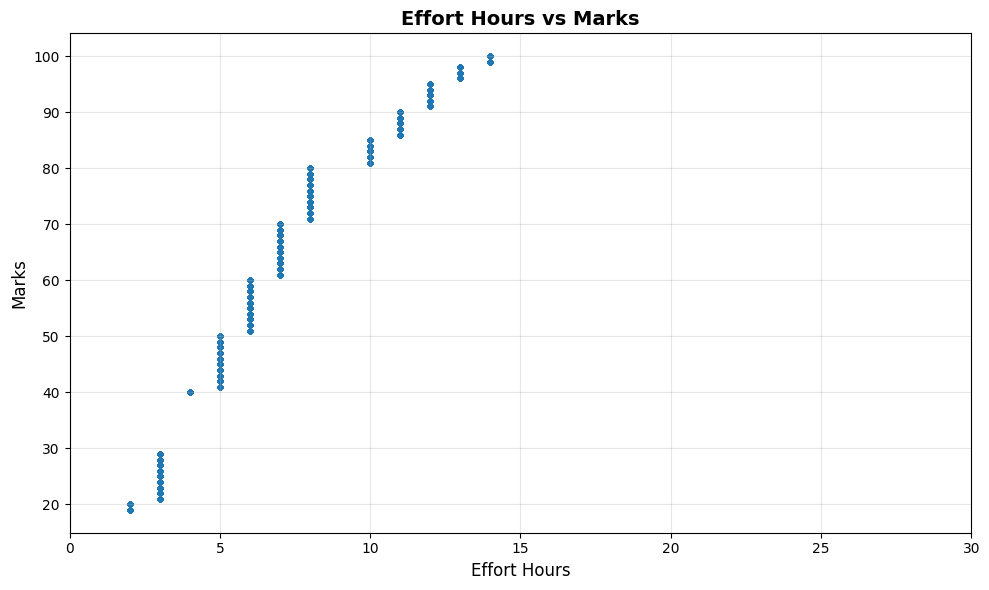

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_df["Effort_Hours"], clean_df["Marks"], alpha=0.5, s=10)
# Focus x-axis on 0-30 to show the main distribution.
plt.xlim(0, 30)
plt.title("Effort Hours vs Marks", fontsize=14, fontweight='bold')
plt.xlabel("Effort Hours", fontsize=12)
plt.ylabel("Marks", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "EffortHours_VS_Marks.png"), dpi=300, bbox_inches="tight")
plt.show()


### Analysis: average marks by department



Top 20 Departments by Average Marks:


,Count,Mean,Median,Std
Department_Name,,,,
Sophisticated Analytical Instrument Facility (SAIF),6313,70.08,70.0,17.93
Centre of Studies in Resources Engineering (CSRE),5051,69.95,70.0,18.06
Centre of Studies in Craft Engineering (CSCE),5051,69.95,70.0,18.06
Centre for Distance Engineering Education Programme (CDEEP),5321,69.91,70.0,18.22
National Centre for Aerospace Innovation and Research (NCAIR),4731,69.89,70.0,18.18
Center for Learning and Teaching (PPCCLT),9758,69.87,70.0,18.22
Centre for Technology Alternatives for Rural Areas (CTARA),5640,69.85,70.0,17.95
Civil Engineering,5100,69.82,70.0,18.04
Chemical Engineering,6819,69.78,70.0,18.02


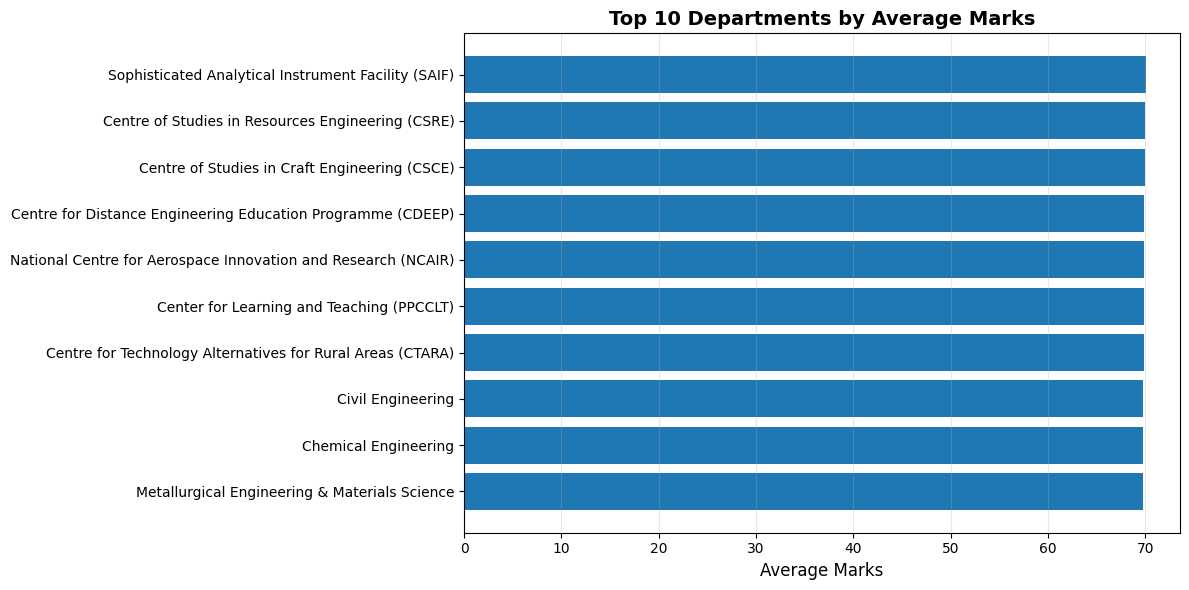

In [5]:
# Calculate average marks per department
avg_dept = clean_df.groupby("Department_Name")["Marks"].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std', 'std')
]).round(2).sort_values('Mean', ascending=False)

print("\nTop 20 Departments by Average Marks:")
display(avg_dept.head(20))

# Visualization
plt.figure(figsize=(12, 6))
top_10_dept = avg_dept.head(10)
plt.barh(range(len(top_10_dept)), top_10_dept['Mean'])
plt.yticks(range(len(top_10_dept)), top_10_dept.index)
plt.xlabel('Average Marks', fontsize=12)
plt.title('Top 10 Departments by Average Marks', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "Top_10_Departments.png"), dpi=300, bbox_inches="tight")
plt.show()

